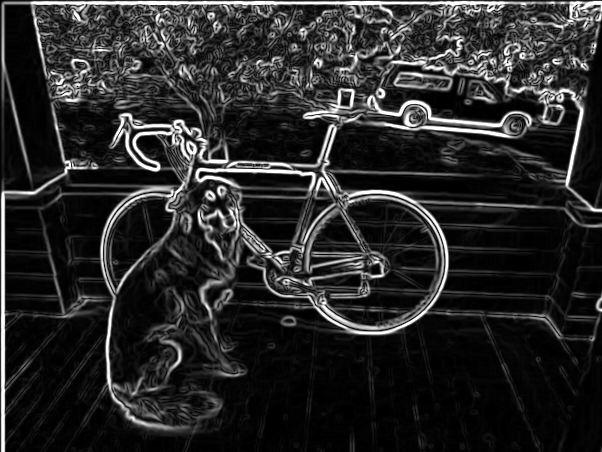

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def rgb2gray(rgb):
    r,g,b=rgb[:,:,0],rgb[:,:,1],rgb[:,:,2]
    gray=0.2989*r+0.5870*g+0.1140*b
    return gray    
    
def convolution(image,kernel):
    img_row,img_column=image.shape
    output=np.zeros(image.shape)
    padded_img=np.zeros((img_row+kernel.shape[0]-1,img_column+kernel.shape[1]-1))
    padded_img[kernel.shape[0]-1:img_row+kernel.shape[0]-1,kernel.shape[1]-1:img_column+kernel.shape[1]-1]=image
    for i in range(img_column):
        for j in range(img_row):
            output[j,i]=np.sum(padded_img[j:j+kernel.shape[0],i:i+kernel.shape[1]]*kernel)
    return output
    
x_directional_kernel=np.array([[-1,0,1],
                             [-2,0,2],
                             [-1,0,1]])

y_directional_kernel=np.array([[-1,-2,-1],
                            [0,0,0],
                            [1,2,1]])

gaussian_blur=np.array([[1,4,6,4,1],
                      [4,16,24,16,4],
                      [6,24,36,24,6],
                      [4,16,24,16,4],
                      [1,4,6,4,1]])/256

file="edgedetection.png"
im=rgb2gray(np.array(Image.open(file)))
im=convolution(im,gaussian_blur)
imx=convolution(im,x_directional_kernel)
imy=convolution(im,y_directional_kernel)
im=(imx**2+imy**2)**0.5
new_img=Image.fromarray(im).convert('RGB')
new_img.save('sobel.png')
Image.open('sobel.png')
    
  